# Part1 : Unemployment in 2020 vs Covid in 2020

In [1]:
# %matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress
from ipywidgets import interact

## 1.1 Create CovidUnemployment_df DataFrame to use for analysis

In [2]:
# Load 'ABSLabourForceDetailedTable20c.csv' file into df DataFrame
df = pd.read_csv("source/ABSLabourForceDetailedTable20c.csv", encoding="utf-8")
df.head(10)

,Unnamed: 0,Australia ; Unemployed total ;,Australia ; > Unemployed looked for full-time work ;,Australia ; >> Unemployed looked for only full-time work ;,Australia ; >> Unemployed looked for both full-time and part-time work ;,Australia ; > Unemployed looked for only part-time work ;,> New South Wales ; Unemployed total ;,> New South Wales ; > Unemployed looked for full-time work ;,> New South Wales ; >> Unemployed looked for only full-time work ;,> New South Wales ; >> Unemployed looked for both full-time and part-time work ;,...,> Northern Territory ; Unemployed total ;,> Northern Territory ; > Unemployed looked for full-time work ;,> Northern Territory ; >> Unemployed looked for only full-time work ;,> Northern Territory ; >> Unemployed looked for both full-time and part-time work ;,> Northern Territory ; > Unemployed looked for only part-time work ;,> Australian Capital Territory ; Unemployed total ;,> Australian Capital Territory ; > Unemployed looked for full-time work ;,> Australian Capital Territory ; >> Unemployed looked for only full-time work ;,> Australian Capital Territory ; >> Unemployed looked for both full-time and part-time work ;,> Australian Capital Territory ; > Unemployed looked for only part-time work ;
0,Unit,000,000,000,000,000,000,000,000,000,...,000,000,000,000,000,000,000,000,000,000
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,...,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Series Start,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,...,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014
6,Series End,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,...,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021
7,No. Obs,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
8,Series ID,A84088035W,A84088036X,A84088038C,A84088037A,A84088039F,A84088030K,A84088031L,A84088033T,A84088032R,...,A84088060X,A84088061A,A84088063F,A84088062C,A84088064J,A84088050V,A84088051W,A84088053A,A84088052X,A84088054C
9,Jul-2014,741.7,540.6,126.2,414.4,201.1,214.7,156.5,35.5,121.0,...,7.4,5.4,3.1,2.3,2.0,8.8,5.3,1.8,3.5,3.5


In [3]:
#Check the columns
df.columns

Index(['Unnamed: 0', 'Australia ;  Unemployed total ;',
       'Australia ;  > Unemployed looked for full-time work ;',
       'Australia ;  >> Unemployed looked for only full-time work ;',
       'Australia ;  >> Unemployed looked for both full-time and part-time work ;',
       'Australia ;  > Unemployed looked for only part-time work ;',
       '> New South Wales ;  Unemployed total ;',
       '> New South Wales ;  > Unemployed looked for full-time work ;',
       '> New South Wales ;  >> Unemployed looked for only full-time work ;',
       '> New South Wales ;  >> Unemployed looked for both full-time and part-time work ;',
       '> New South Wales ;  > Unemployed looked for only part-time work ;',
       '> Victoria ;  Unemployed total ;',
       '> Victoria ;  > Unemployed looked for full-time work ;',
       '> Victoria ;  >> Unemployed looked for only full-time work ;',
       '> Victoria ;  >> Unemployed looked for both full-time and part-time work ;',
       '> Victoria ;  > 

In [4]:
#Remove unwanted rows(title rows) from df
df = df.iloc[9:,:]
df.head()

,Unnamed: 0,Australia ; Unemployed total ;,Australia ; > Unemployed looked for full-time work ;,Australia ; >> Unemployed looked for only full-time work ;,Australia ; >> Unemployed looked for both full-time and part-time work ;,Australia ; > Unemployed looked for only part-time work ;,> New South Wales ; Unemployed total ;,> New South Wales ; > Unemployed looked for full-time work ;,> New South Wales ; >> Unemployed looked for only full-time work ;,> New South Wales ; >> Unemployed looked for both full-time and part-time work ;,...,> Northern Territory ; Unemployed total ;,> Northern Territory ; > Unemployed looked for full-time work ;,> Northern Territory ; >> Unemployed looked for only full-time work ;,> Northern Territory ; >> Unemployed looked for both full-time and part-time work ;,> Northern Territory ; > Unemployed looked for only part-time work ;,> Australian Capital Territory ; Unemployed total ;,> Australian Capital Territory ; > Unemployed looked for full-time work ;,> Australian Capital Territory ; >> Unemployed looked for only full-time work ;,> Australian Capital Territory ; >> Unemployed looked for both full-time and part-time work ;,> Australian Capital Territory ; > Unemployed looked for only part-time work ;
9,Jul-2014,741.7,540.6,126.2,414.4,201.1,214.7,156.5,35.5,121.0,...,7.4,5.4,3.1,2.3,2.0,8.8,5.3,1.8,3.5,3.5
10,Aug-2014,733.8,517.2,106.1,411.1,216.6,214.4,148.7,32.8,115.9,...,5.4,4.5,1.5,3.0,1.0,11.2,6.8,1.4,5.4,4.4
11,Sep-2014,746.4,525.1,97.3,427.7,221.4,222.4,159.3,29.1,130.2,...,4.7,3.8,1.3,2.5,0.9,10.5,5.6,1.3,4.3,4.9
12,Oct-2014,752.0,518.9,87.4,431.5,233.1,220.7,152.8,23.4,129.4,...,3.9,3.2,0.8,2.5,0.7,12.4,7.9,2.2,5.7,4.5
13,Nov-2014,723.8,518.4,95.5,422.9,205.3,225.0,157.4,33.5,123.9,...,5.1,4.2,1.1,3.1,0.8,9.0,6.6,2.0,4.6,2.4


In [5]:
#Remove unwanted columns from df
df = df.loc[:,['Unnamed: 0','Australia ;  Unemployed total ;','> New South Wales ;  Unemployed total ;',
               '> Victoria ;  Unemployed total ;','> Queensland ;  Unemployed total ;',
               '> South Australia ;  Unemployed total ;','> Western Australia ;  Unemployed total ;',
               '> Tasmania ;  Unemployed total ;','> Northern Territory ;  Unemployed total ;',
               '> Australian Capital Territory ;  Unemployed total ;']]
df.head()

,Unnamed: 0,Australia ; Unemployed total ;,> New South Wales ; Unemployed total ;,> Victoria ; Unemployed total ;,> Queensland ; Unemployed total ;,> South Australia ; Unemployed total ;,> Western Australia ; Unemployed total ;,> Tasmania ; Unemployed total ;,> Northern Territory ; Unemployed total ;,> Australian Capital Territory ; Unemployed total ;
9,Jul-2014,741.7,214.7,208.1,159.4,57.8,67.4,18.0,7.4,8.8
10,Aug-2014,733.8,214.4,211.2,159.5,48.8,65.5,17.8,5.4,11.2
11,Sep-2014,746.4,222.4,210.7,154.2,56.0,69.1,18.9,4.7,10.5
12,Oct-2014,752.0,220.7,206.7,167.3,57.1,67.3,16.4,3.9,12.4
13,Nov-2014,723.8,225.0,197.3,153.2,54.9,62.0,17.3,5.1,9.0


In [6]:
#Create unemployed_df DataFrame by renaming columns in df and then remove NA values
unemployed_df = df.rename (columns ={'Unnamed: 0':'Month',
                                     'Australia ;  Unemployed total ;':'Total',
                                     '> New South Wales ;  Unemployed total ;':'NSW',
                                     '> Victoria ;  Unemployed total ;':'VIC',
                                     '> Queensland ;  Unemployed total ;':'QLD',
                                     '> South Australia ;  Unemployed total ;':'SA',
                                     '> Western Australia ;  Unemployed total ;':'WA',
                                     '> Tasmania ;  Unemployed total ;':'TAS',
                                     '> Northern Territory ;  Unemployed total ;':'NT',
                                     '> Australian Capital Territory ;  Unemployed total ;':'ACT'})
unemployed_df.dropna()

,Month,Total,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
9,Jul-2014,741.7,214.7,208.1,159.4,57.8,67.4,18.0,7.4,8.8
10,Aug-2014,733.8,214.4,211.2,159.5,48.8,65.5,17.8,5.4,11.2
11,Sep-2014,746.4,222.4,210.7,154.2,56.0,69.1,18.9,4.7,10.5
12,Oct-2014,752.0,220.7,206.7,167.3,57.1,67.3,16.4,3.9,12.4
13,Nov-2014,723.8,225.0,197.3,153.2,54.9,62.0,17.3,5.1,9.0
...,...,...,...,...,...,...,...,...,...,...
84,Oct-2020,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4
85,Nov-2020,875.2,261.5,241.5,188.1,55.7,90.2,20.6,8.5,9.2
86,Dec-2020,873.3,270.3,229.3,192.3,56.4,90.3,19.1,6.7,9.0
87,Jan-2021,938.0,275.4,250.0,208.0,67.7,100.0,17.0,8.2,11.8


In [7]:
#Create unemployed2020_df DataFrame by filtering unemployed_df for 2020 data
unemployed2020_df = unemployed_df.loc[unemployed_df['Month'].str[-4:]=='2020']
unemployed2020_df['Month'] = unemployed2020_df['Month'].map(lambda x: x.replace("2020","20"))
unemployed2020_df

<ipython-input-7-70c4ea503d72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployed2020_df['Month'] = unemployed2020_df['Month'].map(lambda x: x.replace("2020","20"))


,Month,Total,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
75,Jan-20,775.1,205.2,211.4,180.8,53.9,92.1,16.6,7.3,7.7
76,Feb-20,761.1,215.1,209.1,167.2,56.7,82.1,14.5,8.5,8.0
77,Mar-20,765.6,222.9,198.5,167.5,60.1,86.6,13.8,7.6,8.5
78,Apr-20,850.5,262.5,215.3,188.1,63.9,86.1,16.2,8.6,9.8
79,May-20,904.7,261.0,231.0,201.7,68.2,108.4,16.0,9.5,9.0
80,Jun-20,966.5,284.2,250.8,207.2,75.8,113.3,17.8,7.2,10.1
81,Jul-20,994.7,306.0,236.3,228.9,71.6,114.2,17.1,9.7,10.9
82,Aug-20,921.9,280.0,246.0,194.0,68.8,99.5,17.2,5.9,10.6
83,Sep-20,909.4,296.2,223.0,198.9,59.6,95.4,20.1,6.7,9.4
84,Oct-20,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4


#### Plesae note that unemployed2020_df figures need to be mutiple by 1000 (based on unit in Table20c in ABS Labour Force Detailed Dataset)

In [8]:
#Load 'Covid19State.csv' file into Covid19State_df DataFrame
Covid19State_df = pd.read_csv("source/Covid19State.csv", encoding="utf-8")

Covid19State_df

,Month,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Australia
0,Nov-19,0,0,0,0,0,0,0,0,0
1,Dec-19,0,1,0,0,0,0,0,0,1
2,Jan-20,0,4,0,2,2,0,4,1,13
3,Feb-20,0,51,0,19,4,2,15,8,99
4,Mar-20,99,2772,25,983,410,87,1210,476,6062
5,Apr-20,8,438,4,66,23,143,190,104,976
6,May-20,1,66,0,9,1,1,256,34,368
7,Jun-20,0,132,1,9,3,0,938,15,1098
8,Jul-20,5,391,1,16,11,1,9751,48,10224
9,Aug-20,0,277,0,42,9,1,6927,15,7271


In [9]:
#Create covid_df DataFrame by filtering 2020 data and then remove NA values
covid_df = Covid19State_df.iloc[2:14,:]
covid_df.dropna()

,Month,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Australia
2,Jan-20,0,4,0,2,2,0,4,1,13
3,Feb-20,0,51,0,19,4,2,15,8,99
4,Mar-20,99,2772,25,983,410,87,1210,476,6062
5,Apr-20,8,438,4,66,23,143,190,104,976
6,May-20,1,66,0,9,1,1,256,34,368
7,Jun-20,0,132,1,9,3,0,938,15,1098
8,Jul-20,5,391,1,16,11,1,9751,48,10224
9,Aug-20,0,277,0,42,9,1,6927,15,7271
10,Sep-20,0,166,0,27,10,0,898,34,1135
11,Oct-20,2,205,6,15,29,0,154,83,494


In [10]:
#Merge unemployed2020_df and covid_df DataFrames
merged_df = pd.merge(unemployed2020_df,covid_df, on="Month", suffixes=('_Unemployed', '_Covid19Cases'), how= 'inner')
merged_df

,Month,Total,NSW_Unemployed,VIC_Unemployed,QLD_Unemployed,SA_Unemployed,WA_Unemployed,TAS_Unemployed,NT_Unemployed,ACT_Unemployed,ACT_Covid19Cases,NSW_Covid19Cases,NT_Covid19Cases,QLD_Covid19Cases,SA_Covid19Cases,TAS_Covid19Cases,VIC_Covid19Cases,WA_Covid19Cases,Australia
0,Jan-20,775.1,205.2,211.4,180.8,53.9,92.1,16.6,7.3,7.7,0,4,0,2,2,0,4,1,13
1,Feb-20,761.1,215.1,209.1,167.2,56.7,82.1,14.5,8.5,8.0,0,51,0,19,4,2,15,8,99
2,Mar-20,765.6,222.9,198.5,167.5,60.1,86.6,13.8,7.6,8.5,99,2772,25,983,410,87,1210,476,6062
3,Apr-20,850.5,262.5,215.3,188.1,63.9,86.1,16.2,8.6,9.8,8,438,4,66,23,143,190,104,976
4,May-20,904.7,261.0,231.0,201.7,68.2,108.4,16.0,9.5,9.0,1,66,0,9,1,1,256,34,368
5,Jun-20,966.5,284.2,250.8,207.2,75.8,113.3,17.8,7.2,10.1,0,132,1,9,3,0,938,15,1098
6,Jul-20,994.7,306.0,236.3,228.9,71.6,114.2,17.1,9.7,10.9,5,391,1,16,11,1,9751,48,10224
7,Aug-20,921.9,280.0,246.0,194.0,68.8,99.5,17.2,5.9,10.6,0,277,0,42,9,1,6927,15,7271
8,Sep-20,909.4,296.2,223.0,198.9,59.6,95.4,20.1,6.7,9.4,0,166,0,27,10,0,898,34,1135
9,Oct-20,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4,2,205,6,15,29,0,154,83,494


In [11]:
#rename some columns in merged_df
merged_df = merged_df.rename (columns ={'Month':'@Month',
                                        'Total' : 'total_unemployed',
                                        'Australia':'total_Australia_Covid19Cases'})
merged_df

,@Month,total_unemployed,NSW_Unemployed,VIC_Unemployed,QLD_Unemployed,SA_Unemployed,WA_Unemployed,TAS_Unemployed,NT_Unemployed,ACT_Unemployed,ACT_Covid19Cases,NSW_Covid19Cases,NT_Covid19Cases,QLD_Covid19Cases,SA_Covid19Cases,TAS_Covid19Cases,VIC_Covid19Cases,WA_Covid19Cases,total_Australia_Covid19Cases
0,Jan-20,775.1,205.2,211.4,180.8,53.9,92.1,16.6,7.3,7.7,0,4,0,2,2,0,4,1,13
1,Feb-20,761.1,215.1,209.1,167.2,56.7,82.1,14.5,8.5,8.0,0,51,0,19,4,2,15,8,99
2,Mar-20,765.6,222.9,198.5,167.5,60.1,86.6,13.8,7.6,8.5,99,2772,25,983,410,87,1210,476,6062
3,Apr-20,850.5,262.5,215.3,188.1,63.9,86.1,16.2,8.6,9.8,8,438,4,66,23,143,190,104,976
4,May-20,904.7,261.0,231.0,201.7,68.2,108.4,16.0,9.5,9.0,1,66,0,9,1,1,256,34,368
5,Jun-20,966.5,284.2,250.8,207.2,75.8,113.3,17.8,7.2,10.1,0,132,1,9,3,0,938,15,1098
6,Jul-20,994.7,306.0,236.3,228.9,71.6,114.2,17.1,9.7,10.9,5,391,1,16,11,1,9751,48,10224
7,Aug-20,921.9,280.0,246.0,194.0,68.8,99.5,17.2,5.9,10.6,0,277,0,42,9,1,6927,15,7271
8,Sep-20,909.4,296.2,223.0,198.9,59.6,95.4,20.1,6.7,9.4,0,166,0,27,10,0,898,34,1135
9,Oct-20,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4,2,205,6,15,29,0,154,83,494


In [12]:
#Create CovidUnemployment_df DataFrmae by sorting the columns in merged_df
CovidUnemployment_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
CovidUnemployment_df

,@Month,ACT_Covid19Cases,ACT_Unemployed,NSW_Covid19Cases,NSW_Unemployed,NT_Covid19Cases,NT_Unemployed,QLD_Covid19Cases,QLD_Unemployed,SA_Covid19Cases,SA_Unemployed,TAS_Covid19Cases,TAS_Unemployed,VIC_Covid19Cases,VIC_Unemployed,WA_Covid19Cases,WA_Unemployed,total_Australia_Covid19Cases,total_unemployed
0,Jan-20,0,7.7,4,205.2,0,7.3,2,180.8,2,53.9,0,16.6,4,211.4,1,92.1,13,775.1
1,Feb-20,0,8.0,51,215.1,0,8.5,19,167.2,4,56.7,2,14.5,15,209.1,8,82.1,99,761.1
2,Mar-20,99,8.5,2772,222.9,25,7.6,983,167.5,410,60.1,87,13.8,1210,198.5,476,86.6,6062,765.6
3,Apr-20,8,9.8,438,262.5,4,8.6,66,188.1,23,63.9,143,16.2,190,215.3,104,86.1,976,850.5
4,May-20,1,9.0,66,261.0,0,9.5,9,201.7,1,68.2,1,16.0,256,231.0,34,108.4,368,904.7
5,Jun-20,0,10.1,132,284.2,1,7.2,9,207.2,3,75.8,0,17.8,938,250.8,15,113.3,1098,966.5
6,Jul-20,5,10.9,391,306.0,1,9.7,16,228.9,11,71.6,1,17.1,9751,236.3,48,114.2,10224,994.7
7,Aug-20,0,10.6,277,280.0,0,5.9,42,194.0,9,68.8,1,17.2,6927,246.0,15,99.5,7271,921.9
8,Sep-20,0,9.4,166,296.2,0,6.7,27,198.9,10,59.6,0,20.1,898,223.0,34,95.4,1135,909.4
9,Oct-20,2,9.4,205,274.2,6,7.8,15,200.5,29,61.2,0,20.5,154,241.4,83,92.6,494,907.5


In [13]:
#rename index and remove unwanted column
CovidUnemployment_df = CovidUnemployment_df.rename(index = {0:'Jan-20',1:'Feb-20',2:'Mar-20',
                                                            3:'Apr-20',4:'May-20',5:'Jun-20',
                                                            6:'Jul-20',7:'Aug-20',8:'Sep-20',
                                                            9:'Oct-20',10:'Nov-20',11:'Dec-20'})
CovidUnemployment_df = CovidUnemployment_df.iloc[:,1:]
CovidUnemployment_df

,ACT_Covid19Cases,ACT_Unemployed,NSW_Covid19Cases,NSW_Unemployed,NT_Covid19Cases,NT_Unemployed,QLD_Covid19Cases,QLD_Unemployed,SA_Covid19Cases,SA_Unemployed,TAS_Covid19Cases,TAS_Unemployed,VIC_Covid19Cases,VIC_Unemployed,WA_Covid19Cases,WA_Unemployed,total_Australia_Covid19Cases,total_unemployed
Jan-20,0,7.7,4,205.2,0,7.3,2,180.8,2,53.9,0,16.6,4,211.4,1,92.1,13,775.1
Feb-20,0,8.0,51,215.1,0,8.5,19,167.2,4,56.7,2,14.5,15,209.1,8,82.1,99,761.1
Mar-20,99,8.5,2772,222.9,25,7.6,983,167.5,410,60.1,87,13.8,1210,198.5,476,86.6,6062,765.6
Apr-20,8,9.8,438,262.5,4,8.6,66,188.1,23,63.9,143,16.2,190,215.3,104,86.1,976,850.5
May-20,1,9.0,66,261.0,0,9.5,9,201.7,1,68.2,1,16.0,256,231.0,34,108.4,368,904.7
Jun-20,0,10.1,132,284.2,1,7.2,9,207.2,3,75.8,0,17.8,938,250.8,15,113.3,1098,966.5
Jul-20,5,10.9,391,306.0,1,9.7,16,228.9,11,71.6,1,17.1,9751,236.3,48,114.2,10224,994.7
Aug-20,0,10.6,277,280.0,0,5.9,42,194.0,9,68.8,1,17.2,6927,246.0,15,99.5,7271,921.9
Sep-20,0,9.4,166,296.2,0,6.7,27,198.9,10,59.6,0,20.1,898,223.0,34,95.4,1135,909.4
Oct-20,2,9.4,205,274.2,6,7.8,15,200.5,29,61.2,0,20.5,154,241.4,83,92.6,494,907.5


## 1.2 Plots and graphs related to CovidUnemployment_df

#### 1.2.1 Compare 2019 and 2020 unemployment

In [14]:
# Create a dataframe to compare 2019 and 2020 unemployment
unemployedcompare_df = unemployed_df.loc[unemployed_df['Month'].str[-4:]>'2018']
unemployedcompare_df = unemployedcompare_df.loc[unemployed_df['Month'].str[-4:]<'2021']
# filter dataframe for total
unemployedcompare_filtered = unemployedcompare_df.filter(items=["Month", "Total"])
unemployedcompare_filtered

,Month,Total
63,Jan-2019,726.9
64,Feb-2019,727.8
65,Mar-2019,731.8
66,Apr-2019,714.0
67,May-2019,694.3
68,Jun-2019,692.0
69,Jul-2019,702.6
70,Aug-2019,714.4
71,Sep-2019,691.8
72,Oct-2019,685.8


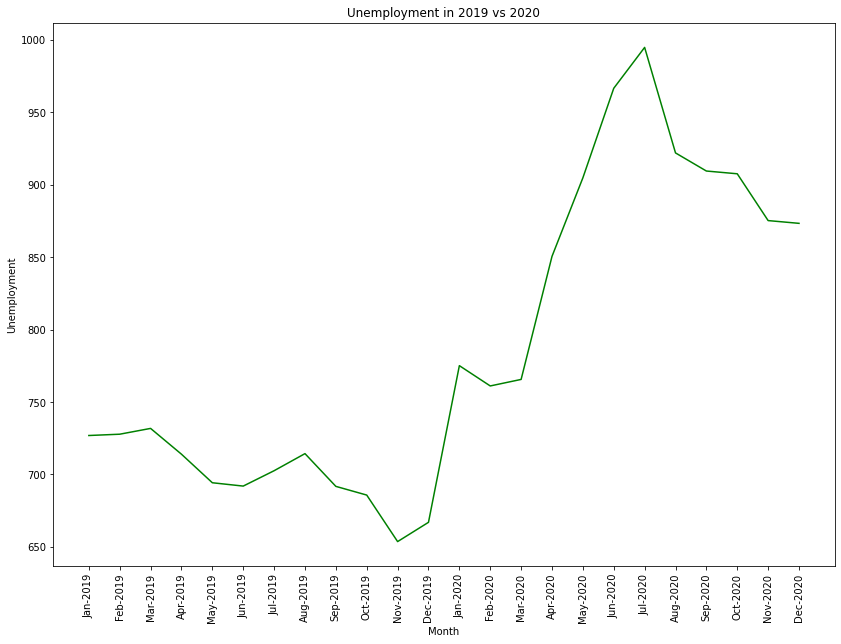

In [15]:
# Plot the graph for unemployment in 2019 vs 2020
plt.figure(figsize=(14,10))
plt.plot(unemployedcompare_filtered['Month'],unemployedcompare_filtered['Total'].astype(float),color = 'green')
plt.title("Unemployment in 2019 vs 2020")
plt.xticks(unemployedcompare_filtered['Month'],unemployedcompare_filtered['Month'], rotation='vertical')
plt.xlabel("Month")
plt.ylabel("Unemployment")
plt.savefig('Outputs/Unemployment_in_2019_vs_2020')

#### 1.2.2 How Covid-19 hit Austraia in 2020 - This chart shows how many new Covid-19 cases Australia had in each month of 2020

In [16]:
covid_df[['Month','Australia']]

,Month,Australia
2,Jan-20,13
3,Feb-20,99
4,Mar-20,6062
5,Apr-20,976
6,May-20,368
7,Jun-20,1098
8,Jul-20,10224
9,Aug-20,7271
10,Sep-20,1135
11,Oct-20,494


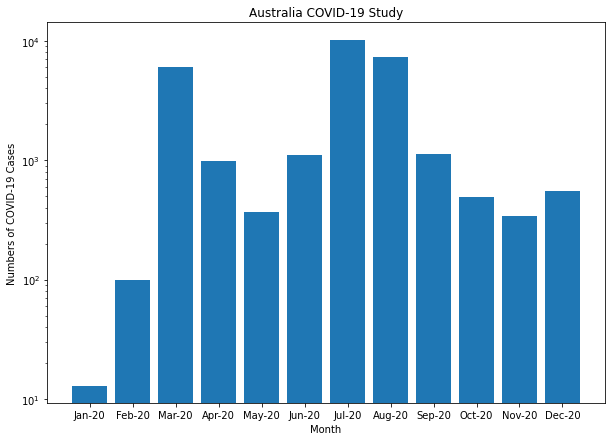

In [17]:
#Plot bar chart based on Total Covid cases in Austrlia during 2020
x_axis = covid_df['Month']
y_axis= covid_df['Australia']
plt.figure(figsize=(10,7))
plt.bar(x_axis,y_axis)
plt.yscale('log')
plt.title("Australia COVID-19 Study")
plt.xlabel("Month")
plt.ylabel("Numbers of COVID-19 Cases")
plt.savefig('Outputs/Australia_COVID-19_Study')

#### 1.2.3 How Covid-19 hit Australain states in 2020 - This chart shows number of Covid-19 cases in each state by the end of 2020

In [18]:
#Create covid_2020_df which shows total covid cases in each states in 2020
covid_2020_df = pd.DataFrame({'ACT': covid_df['ACT'].sum(),
                              'NSW': covid_df['NSW'].sum(),
                              'NT': covid_df['NT'].sum(),
                              'QLD': covid_df['QLD'].sum(),
                              'SA': covid_df['SA'].sum(),
                              'TAS': covid_df['TAS'].sum(),
                              'VIC': covid_df['VIC'].sum(),
                              'WA': covid_df['WA'].sum()
                             },
                                index={'Total Covid Cases in 2020'})
covid_2020_df= covid_2020_df.T
covid_2020_df

,Total Covid Cases in 2020
ACT,118
NSW,5043
NT,80
QLD,1269
SA,581
TAS,239
VIC,20385
WA,923


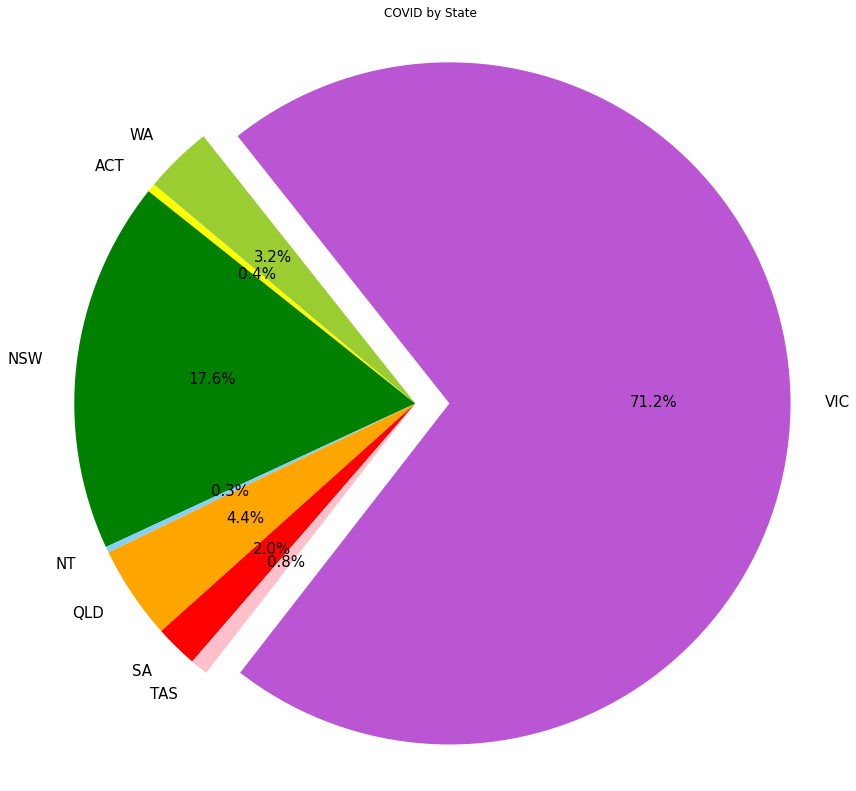

In [19]:
states = ['ACT', 'NSW', 'NT', 'QLD','SA', 'TAS', 'VIC', 'WA']
colors = ["yellow","green","lightskyblue","orange","red","pink","mediumorchid","yellowgreen"]
explode = (0,0,0,0,0,0,0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(14,14))
plt.pie(covid_2020_df['Total Covid Cases in 2020'],explode=explode,labels=states,colors=colors,autopct="%1.1f%%", startangle=140, textprops={'fontsize': 15})
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("COVID by State")

# # Save an image of our chart and print the final product to the screen
plt.savefig('Outputs/COVID_by_State_pie')
plt.show()

#### 1.2.4 Unemployment and coivd-19 in each state and in Australia

In [20]:
location = ['ACT','NSW','NT','QLD','SA','TAS','VIC','WA','Australia']
def plotting(location, dfIR, dfU):
    
    if location =='Australia':
        (dfU['total_unemployed'].astype(float)).plot(kind='bar', figsize=(20,10))
        plt.ylabel("Unemployed ('000)")
        (dfIR['total_Australia_Covid19Cases'].astype(float)).plot(kind='line', color='red', marker='d', secondary_y=True)
        plt.ylabel("Number of Infections")
        plt.title("Unemployed vs Infection rate")
    else:
        (dfU[location+'_Unemployed'].astype(float)).plot(kind='bar', figsize=(20,10))
        plt.ylabel("Unemployed ('000)")
        (dfIR[location+'_Covid19Cases'].astype(float)).plot(kind='line', color='red', marker='d', secondary_y=True)
        plt.ylabel("Number of Infections")
        plt.title("Unemployed vs Infection rate")
    
    
    plt.show()
    plt.tight_layout()
    
def f(location):
    plotting(location, CovidUnemployment_df, CovidUnemployment_df)
interact(f, location=location)



interactive(children=(Dropdown(description='location', options=('ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC',…

<function __main__.f(location)>

#### 1.2.5 Compare VIC and WA unemployment and coivd-19 impact on them

In [21]:
# CovidUnemployment for VIC
VICWA_CovidUnemployment = pd.DataFrame({
    "VIC_Covid19Cases":CovidUnemployment_df["VIC_Covid19Cases"].astype(float),
    "VIC_Unemployed":(CovidUnemployment_df["VIC_Unemployed"].astype(float)),
    "WA_Covid19Cases":CovidUnemployment_df["WA_Covid19Cases"].astype(float),
    "WA_Unemployed":(CovidUnemployment_df["WA_Unemployed"].astype(float)),
    }, 
    index=['Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20']
)
VICWA_CovidUnemployment

,VIC_Covid19Cases,VIC_Unemployed,WA_Covid19Cases,WA_Unemployed
Jan-20,4.0,211.4,1.0,92.1
Feb-20,15.0,209.1,8.0,82.1
Mar-20,1210.0,198.5,476.0,86.6
Apr-20,190.0,215.3,104.0,86.1
May-20,256.0,231.0,34.0,108.4
Jun-20,938.0,250.8,15.0,113.3
Jul-20,9751.0,236.3,48.0,114.2
Aug-20,6927.0,246.0,15.0,99.5
Sep-20,898.0,223.0,34.0,95.4
Oct-20,154.0,241.4,83.0,92.6


In [22]:
VICWA_CovidUnemployment.dtypes

VIC_Covid19Cases    float64
VIC_Unemployed      float64
WA_Covid19Cases     float64
WA_Unemployed       float64
dtype: object

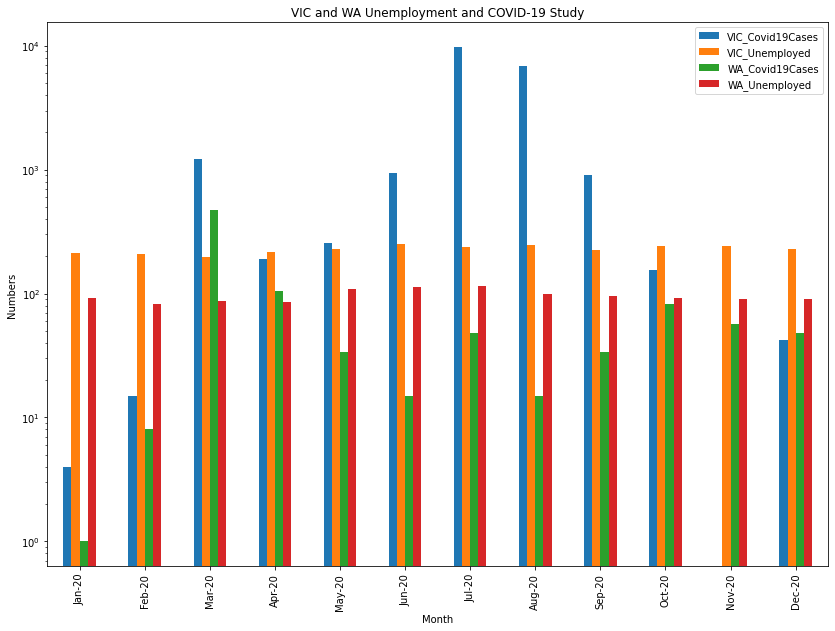

In [23]:
# Bar graph to show VIC & WA unemployment and COVID-19 Study 
VICWA_CovidUnemployment.plot.bar(figsize=(14,10))
plt.yscale('log')
plt.title("VIC and WA Unemployment and COVID-19 Study")
plt.xlabel("Month")
plt.ylabel("Numbers")

plt.savefig('Outputs/VIC_and_WA_Unemployment_and_COVID-19_Study')

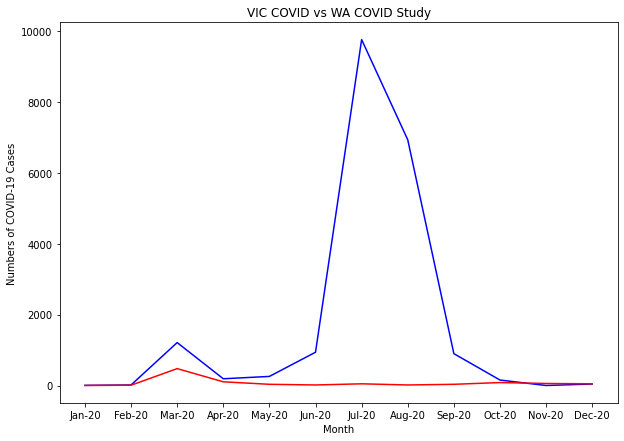

In [24]:
# PLot line graph comparing VIC COVID vs WA COVID Study
plt.figure(figsize=(10,7))
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Covid19Cases'],color = 'blue',label='covid')
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['WA_Covid19Cases'],color = 'red',label='covid')
plt.title("VIC COVID vs WA COVID Study")
plt.xlabel("Month")
plt.ylabel("Numbers of COVID-19 Cases")

# Save the figure 
plt.savefig('Outputs/VIC_COVID_vs_WA_COVID_Study')

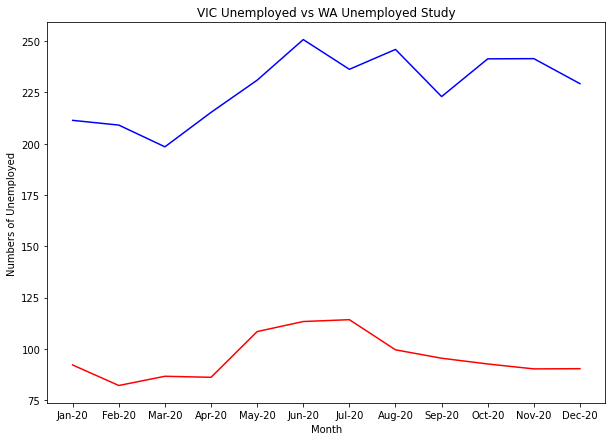

In [25]:
# PLot line graph comparing VIC unemployed vs WA unemployed 
plt.figure(figsize=(10,7))
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Unemployed'],color = 'blue',label='covid')
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['WA_Unemployed'],color = 'red',label='covid')
plt.title("VIC Unemployed vs WA Unemployed Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Unemployed")

plt.savefig('Outputs/VIC COVID vs WA COVID Study')

# Save the figure 
plt.savefig('Outputs/VIC_Unemployed_vs_WA_Unemployed')


## 1.3 determine if unemployment and COVID-19  are correlated.

### 1.3.1 check if VIC unemployment and VIC COVID-19 correlated

The r-squared is: 0.10982591675109456
The p-value is: 0.29267060140290896
The correlation between both factors is 0.33


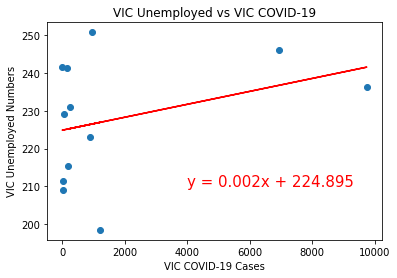

In [54]:
#determine VIC unemployment and VIC covid-19  are correlated. 
x_values = VICWA_CovidUnemployment['VIC_Covid19Cases']
y_values = VICWA_CovidUnemployment['VIC_Unemployed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000,210),fontsize=15,color="red")
plt.xlabel('VIC COVID-19 Cases')
plt.ylabel('VIC Unemployed Numbers')
plt.title('VIC Unemployed vs VIC COVID-19')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/VIC_Unemployed_vs_VIC_COVID-19')

plt.show()

### 1.3.2 check if WA unemployment and WA COVID-19 correlated

The r-squared is: 0.09975779900888757
The p-value is: 0.3172619476515179
The correlation between both factors is -0.32


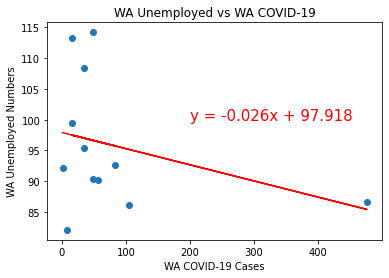

In [55]:
#determine WA unemployment and WA coivd-19  are correlated. 
x_values = VICWA_CovidUnemployment['WA_Covid19Cases']
y_values = VICWA_CovidUnemployment['WA_Unemployed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,100),fontsize=15,color="red")
plt.xlabel('WA COVID-19 Cases')
plt.ylabel('WA Unemployed Numbers')
plt.title('WA Unemployed vs WA COVID-19')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/WA_Unemployed_vs_WA_COVID-19')

plt.show()

### 1.3.3 check if unemployment and Total COVID-19 cases in Australia in 2020 correlated

The r-squared is: 0.12530625236477202
The p-value is: 0.258948970776298
The correlation between both factors is 0.35


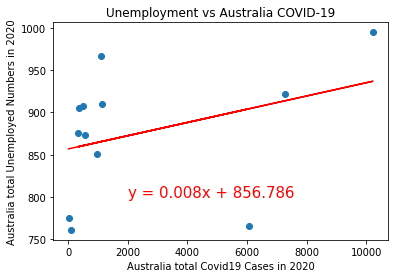

In [53]:

x_values = CovidUnemployment_df['total_Australia_Covid19Cases'].astype(float)
y_values = CovidUnemployment_df['total_unemployed'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,800),fontsize=15,color="red")
plt.xlabel('Australia total Covid19 Cases in 2020')
plt.ylabel('Australia total Unemployed Numbers in 2020')
plt.title('Unemployment vs Australia COVID-19')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/Unemployment_vs_Australia_COVID-19')

plt.show()

# Part2 : Job Vacancies vs Covid-19 (During 2020 Quarters)

## 2.1 Create Covid_JobVac_df DataFarme to use for analysis

In [29]:
#Load 'ABSJobVacancies_Table1.csv' into df1 DataFrame
df1 = pd.read_csv("source/ABSJobVacancies_Table1.csv", encoding="utf-8")
df1.head(10)

,Unnamed: 0,Job Vacancies ; New South Wales ;,Job Vacancies ; Victoria ;,Job Vacancies ; Queensland ;,Job Vacancies ; South Australia ;,Job Vacancies ; Western Australia ;,Job Vacancies ; Tasmania ;,Job Vacancies ; Northern Territory ;,Job Vacancies ; Australian Capital Territory ;,Job Vacancies ; Australia ;,...,Job Vacancies ; Australia ;.2,Standard Error of Job Vacancies ; New South Wales ;,Standard Error of Job Vacancies ; Victoria ;,Standard Error of Job Vacancies ; Queensland ;,Standard Error of Job Vacancies ; South Australia ;,Standard Error of Job Vacancies ; Western Australia ;,Standard Error of Job Vacancies ; Tasmania ;,Standard Error of Job Vacancies ; Northern Territory ;,Standard Error of Job Vacancies ; Australian Capital Territory ;,Standard Error of Job Vacancies ; Australia ;
0,Unit,000,000,000,000,000,000,000,000,000,...,000,000,000,000,000,000,000,000,000,000
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Trend,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,...,STOCK,RATIO,RATIO,RATIO,RATIO,RATIO,RATIO,RATIO,RATIO,RATIO
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,...,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,Series Start,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,May-1979,...,May-1979,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,Nov-1983,May-1979
6,Series End,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,...,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021
7,No. Obs,150,150,150,150,150,150,150,150,168,...,168,150,150,150,150,150,150,150,150,168
8,Series ID,A590714V,A590732X,A590750C,A590768A,A590786F,A590804X,A590822C,A590840J,A590696A,...,A590700F,A590715W,A590733A,A590751F,A590769C,A590787J,A590805A,A590823F,A590841K,A590697C
9,May-1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Remove unwanted rows and columns(title rows) from df1
df1 = df1.iloc[9:,:10]
df1

,Unnamed: 0,Job Vacancies ; New South Wales ;,Job Vacancies ; Victoria ;,Job Vacancies ; Queensland ;,Job Vacancies ; South Australia ;,Job Vacancies ; Western Australia ;,Job Vacancies ; Tasmania ;,Job Vacancies ; Northern Territory ;,Job Vacancies ; Australian Capital Territory ;,Job Vacancies ; Australia ;
9,May-1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.9
10,Aug-1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.6
11,Nov-1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
12,Feb-1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.2
13,May-1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.8
...,...,...,...,...,...,...,...,...,...,...
172,Feb-2020,79.3,59.7,38.4,11.7,27.6,3.4,2.9,6.6,229.5
173,May-2020,39.8,28.7,25.2,6.8,16.8,1.9,1.7,3.6,124.5
174,Aug-2020,62.2,45.8,42.1,12.5,32.2,3.4,4.2,5.6,208.0
175,Nov-2020,82.7,58.4,47.9,15.6,37.4,5.1,4.2,7.9,259.2


In [31]:
#Check the columns of df1
df1.columns

Index(['Unnamed: 0', 'Job Vacancies ;  New South Wales ;',
       'Job Vacancies ;  Victoria ;', 'Job Vacancies ;  Queensland ;',
       'Job Vacancies ;  South Australia ;',
       'Job Vacancies ;  Western Australia ;', 'Job Vacancies ;  Tasmania ;',
       'Job Vacancies ;  Northern Territory ;',
       'Job Vacancies ;  Australian Capital Territory ;',
       'Job Vacancies ;  Australia ;'],
      dtype='object')

In [32]:
#Create job_df DataFrame by renaming and then remove NA values
jobVac_df = df1.rename(columns ={'Unnamed: 0':'Quarter',
                                        'Job Vacancies ;  New South Wales ;':'NSW_JobVac',
                                        'Job Vacancies ;  Victoria ;':'VIC_JobVac',
                                        'Job Vacancies ;  Queensland ;':'QLD_JobVac',
                                        'Job Vacancies ;  South Australia ;':'SA_JobVac',
                                        'Job Vacancies ;  Western Australia ;':'WA_JobVac',
                                        'Job Vacancies ;  Tasmania ;':'TAS_JobVac',
                                        'Job Vacancies ;  Northern Territory ;':'NT_JobVac',
                                        'Job Vacancies ;  Australian Capital Territory ;':'ACT_JobVac',
                                        'Job Vacancies ;  Australia ;':'total_Australia_JobVac'})
jobVac_df.dropna()

,Quarter,NSW_JobVac,VIC_JobVac,QLD_JobVac,SA_JobVac,WA_JobVac,TAS_JobVac,NT_JobVac,ACT_JobVac,total_Australia_JobVac
27,Nov-1983,13.6,7.6,5.0,2.6,4.3,0.9,0.5,1.4,36.0
28,Feb-1984,24.6,12.4,5.4,4.2,0.0,0.6,0.5,1.4,49.1
29,May-1984,18.1,10.9,5.0,2.9,0.4,0.4,0.7,1.7,40.1
30,Aug-1984,21.3,9.5,5.0,3.3,3.5,0.9,0.7,1.3,45.3
31,Nov-1984,17.6,13.8,5.2,2.7,5.0,0.8,0.9,1.5,47.7
...,...,...,...,...,...,...,...,...,...,...
172,Feb-2020,79.3,59.7,38.4,11.7,27.6,3.4,2.9,6.6,229.5
173,May-2020,39.8,28.7,25.2,6.8,16.8,1.9,1.7,3.6,124.5
174,Aug-2020,62.2,45.8,42.1,12.5,32.2,3.4,4.2,5.6,208.0
175,Nov-2020,82.7,58.4,47.9,15.6,37.4,5.1,4.2,7.9,259.2


In [33]:
jobVac_df = jobVac_df.loc[jobVac_df['Quarter'].str[-4:]=='2020']
jobVac_df['Quarter'] = jobVac_df['Quarter'].map(lambda x: x.replace("2020","20"))
jobVac_df

,Quarter,NSW_JobVac,VIC_JobVac,QLD_JobVac,SA_JobVac,WA_JobVac,TAS_JobVac,NT_JobVac,ACT_JobVac,total_Australia_JobVac
172,Feb-20,79.3,59.7,38.4,11.7,27.6,3.4,2.9,6.6,229.5
173,May-20,39.8,28.7,25.2,6.8,16.8,1.9,1.7,3.6,124.5
174,Aug-20,62.2,45.8,42.1,12.5,32.2,3.4,4.2,5.6,208.0
175,Nov-20,82.7,58.4,47.9,15.6,37.4,5.1,4.2,7.9,259.2


In [34]:
jobVac_df= jobVac_df.rename(index = {172:'Feb-20',173:'May-20',174:'Aug-20',175:'Nov-20'})
jobVac_df = jobVac_df.iloc[:,1:]
jobVac_df

,NSW_JobVac,VIC_JobVac,QLD_JobVac,SA_JobVac,WA_JobVac,TAS_JobVac,NT_JobVac,ACT_JobVac,total_Australia_JobVac
Feb-20,79.3,59.7,38.4,11.7,27.6,3.4,2.9,6.6,229.5
May-20,39.8,28.7,25.2,6.8,16.8,1.9,1.7,3.6,124.5
Aug-20,62.2,45.8,42.1,12.5,32.2,3.4,4.2,5.6,208.0
Nov-20,82.7,58.4,47.9,15.6,37.4,5.1,4.2,7.9,259.2


In [35]:
#The covid-19 data set loaded initially
Covid19State_df

,Month,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Australia
0,Nov-19,0,0,0,0,0,0,0,0,0
1,Dec-19,0,1,0,0,0,0,0,0,1
2,Jan-20,0,4,0,2,2,0,4,1,13
3,Feb-20,0,51,0,19,4,2,15,8,99
4,Mar-20,99,2772,25,983,410,87,1210,476,6062
5,Apr-20,8,438,4,66,23,143,190,104,976
6,May-20,1,66,0,9,1,1,256,34,368
7,Jun-20,0,132,1,9,3,0,938,15,1098
8,Jul-20,5,391,1,16,11,1,9751,48,10224
9,Aug-20,0,277,0,42,9,1,6927,15,7271


In [36]:
#Create a Dataframe of Covid19State Dataframe for each Quarter in 2020
Q1 = Covid19State_df.iloc[2:5,:]
print(f"Q1:\n{Q1}")
Q2 = Covid19State_df.iloc[5:8,:]
print(f"Q2:\n{Q2}")
Q3 = Covid19State_df.iloc[8:11,:]
print(f"Q3:\n{Q3}")
Q4 = Covid19State_df.iloc[11:14,:]
print(f"Q4:\n{Q4}")

Q1:
    Month  ACT   NSW  NT  QLD   SA  TAS   VIC   WA  Australia
2  Jan-20    0     4   0    2    2    0     4    1         13
3  Feb-20    0    51   0   19    4    2    15    8         99
4  Mar-20   99  2772  25  983  410   87  1210  476       6062
Q2:
    Month  ACT  NSW  NT  QLD  SA  TAS  VIC   WA  Australia
5  Apr-20    8  438   4   66  23  143  190  104        976
6  May-20    1   66   0    9   1    1  256   34        368
7  Jun-20    0  132   1    9   3    0  938   15       1098
Q3:
     Month  ACT  NSW  NT  QLD  SA  TAS   VIC  WA  Australia
8   Jul-20    5  391   1   16  11    1  9751  48      10224
9   Aug-20    0  277   0   42   9    1  6927  15       7271
10  Sep-20    0  166   0   27  10    0   898  34       1135
Q4:
     Month  ACT  NSW  NT  QLD  SA  TAS  VIC  WA  Australia
11  Oct-20    2  205   6   15  29    0  154  83        494
12  Nov-20    2  168  23   33  61    0    0  57        344
13  Dec-20    1  373  20   48  18    4   42  48        554


In [37]:
# Create Covid total summery for each quarter (Feb-20,May-20,Aug-20,Nov-20)
Q1_covid = pd.DataFrame(Q1.iloc[:,1:].sum())
Q2_covid = pd.DataFrame(Q2.iloc[:,1:].sum())
Q3_covid = pd.DataFrame(Q3.iloc[:,1:].sum())
Q4_covid = pd.DataFrame(Q4.iloc[:,1:].sum())
# Reset and rename the index of each quarter
Q1_covid.reset_index(inplace=True)
Q2_covid.reset_index(inplace=True)
Q3_covid.reset_index(inplace=True)
Q4_covid.reset_index(inplace=True)
cQ1= Q1_covid.rename(columns={'index':'Quarter'})
cQ2 = Q2_covid.rename(columns={'index':'Quarter'})
cQ3 = Q3_covid.rename(columns={'index':'Quarter'})
cQ4 = Q4_covid.rename(columns={'index':'Quarter'})
#Create a Quarter Covid DataFrame which contians total covid cases in each state for each quarter
c1 = pd.merge(cQ1,cQ2,on='Quarter')
c2 = pd.merge(cQ3,cQ4,on='Quarter')
Covid_Quarter_df = pd.merge(c1,c2,on='Quarter')
#rename columns and index the Quarter Covid DataFrame and transpose it, then remove the first row which contains the title
Covid_Quarter_df = Covid_Quarter_df.rename(columns={'0_x_x':'Feb-20','0_y_x':'May-20','0_x_y':'Aug-20','0_y_y':'Nov-20'})
Covid_Quarter_df = Covid_Quarter_df.rename(index = {0:'ACT_CovidCase', 1:'NSW_CovidCase', 2:'NT_CovidCase',3:'QLD_CovidCase',
                                                    4:'SA_CovidCase',5:'TAS_CovidCase',6:'VIC_CovidCase',7:'WA_CovidCase',
                                                    8:'total_Australia_CovidCase'})
Covid_Quarter_df = Covid_Quarter_df.T  # Covid_Quarter_df is now trasposed
Covid_Quarter_df = Covid_Quarter_df .iloc[1:,]
Covid_Quarter_df

,ACT_CovidCase,NSW_CovidCase,NT_CovidCase,QLD_CovidCase,SA_CovidCase,TAS_CovidCase,VIC_CovidCase,WA_CovidCase,total_Australia_CovidCase
Feb-20,99,2827,25,1004,416,89,1229,485,6174
May-20,9,636,5,84,27,144,1384,153,2442
Aug-20,5,834,1,85,30,2,17576,97,18630
Nov-20,5,746,49,96,108,4,196,188,1392


In [38]:
#Merge the Quarter Covid DataFrame and Job Vacancies DataFrame and then sort the columns
Covid_JobVac_df = pd.merge(jobVac_df,Covid_Quarter_df,left_index=True, right_index=True)
Covid_JobVac_df= Covid_JobVac_df.reindex(sorted(Covid_JobVac_df.columns), axis=1)
Covid_JobVac_df

,ACT_CovidCase,ACT_JobVac,NSW_CovidCase,NSW_JobVac,NT_CovidCase,NT_JobVac,QLD_CovidCase,QLD_JobVac,SA_CovidCase,SA_JobVac,TAS_CovidCase,TAS_JobVac,VIC_CovidCase,VIC_JobVac,WA_CovidCase,WA_JobVac,total_Australia_CovidCase,total_Australia_JobVac
Feb-20,99,6.6,2827,79.3,25,2.9,1004,38.4,416,11.7,89,3.4,1229,59.7,485,27.6,6174,229.5
May-20,9,3.6,636,39.8,5,1.7,84,25.2,27,6.8,144,1.9,1384,28.7,153,16.8,2442,124.5
Aug-20,5,5.6,834,62.2,1,4.2,85,42.1,30,12.5,2,3.4,17576,45.8,97,32.2,18630,208.0
Nov-20,5,7.9,746,82.7,49,4.2,96,47.9,108,15.6,4,5.1,196,58.4,188,37.4,1392,259.2


## 2.2 Plots and graphs related to COVID_JobVac_df

### 2.2.1 Investigate COVID-19 impact on VIC job vacancies

In [39]:
VIC_Covid_JobVac_df = pd.DataFrame({'Month':['Feb-20','May-20','Aug-20','Nov-20'],
                                    'VIC_CovidCase':Covid_JobVac_df['VIC_CovidCase'].astype(float),
                                   'VIC_JobVac':Covid_JobVac_df['VIC_JobVac'].astype(float)
                                  })
VIC_Covid_JobVac_df.reset_index(drop=True)

,Month,VIC_CovidCase,VIC_JobVac
0,Feb-20,1229.0,59.7
1,May-20,1384.0,28.7
2,Aug-20,17576.0,45.8
3,Nov-20,196.0,58.4


In [40]:
VIC_Covid_JobVac_df.dtypes

Month             object
VIC_CovidCase    float64
VIC_JobVac       float64
dtype: object

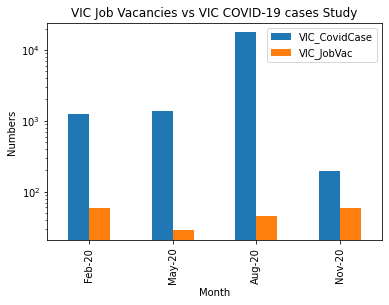

In [41]:
# Plot bar grapg showing VIC Job Vacancies vs VIC Covid-19 cases Study
VIC_Covid_JobVac_df.plot.bar()
plt.yscale('log')
plt.title("VIC Job Vacancies vs VIC COVID-19 cases Study")
plt.xlabel("Month")
plt.ylabel("Numbers")

# Save the figure 
plt.savefig('Outputs/VIC_Job_Vacancies_vs_VIC_COVID-19_cases_Study')

### 2.2.2 Compare VIC and WA job Vacanacies and COVID-19 impact on them

In [42]:
Covid_JobVac_df[['VIC_CovidCase','VIC_JobVac','WA_JobVac','WA_JobVac']]

,VIC_CovidCase,VIC_JobVac,WA_JobVac,WA_JobVac
Feb-20,1229,59.7,27.6,27.6
May-20,1384,28.7,16.8,16.8
Aug-20,17576,45.8,32.2,32.2
Nov-20,196,58.4,37.4,37.4


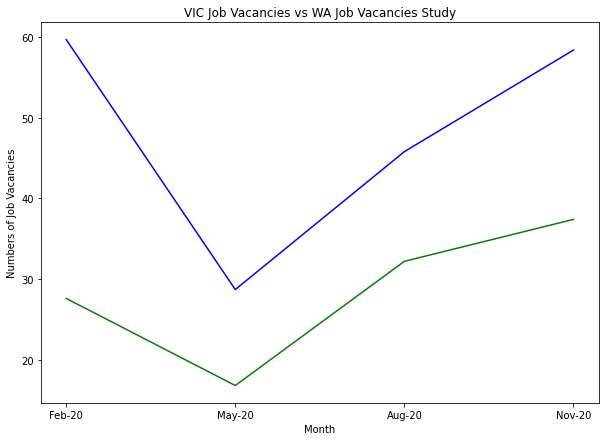

In [43]:
# Plot linegraph showing VIC job vacancies s WA job vacanies 
plt.figure(figsize=(10,7))
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['VIC_JobVac'].astype(float),color = 'blue',label='covid')
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['WA_JobVac'].astype(float),color = 'green',label='covid')
plt.title("VIC Job Vacancies vs WA Job Vacancies Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Job Vacancies")

# Save the figure 
plt.savefig('Outputs/VIC_Job_Vacancies_vs_WA_Job_Vacancies_Study')


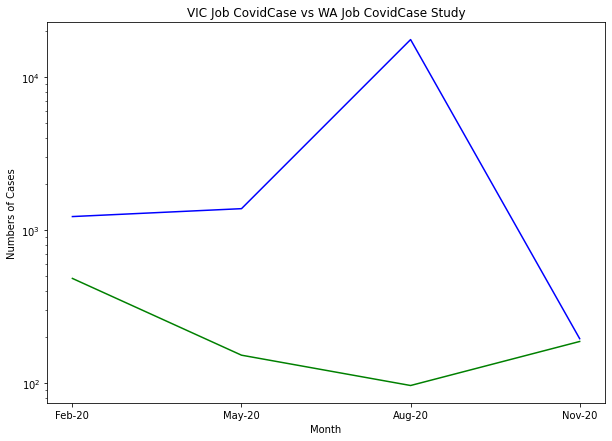

In [44]:
# Plot linegraph showing VIC Job Vacancies vs WA Job Vacancies Study
plt.figure(figsize=(10,7))
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['VIC_CovidCase'].astype(float),color = 'blue',label='covid')
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['WA_CovidCase'].astype(float),color = 'green',label='covid')
plt.title("VIC Job CovidCase vs WA Job CovidCase Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")
plt.yscale('log')

# Save the figure 
plt.savefig('Outputs/VIC_Job_CovidCase_vs_WA_Job_CovidCase_Study')


## 2.3 determine if Job Vacancies number and COVID-19 case number are correlated

### 2.3.1 check if Job Vacancy Numbers and Total COVID-19 cases in VIC in 2020 correlated

The r-squared is: 0.02085597252015531
The p-value is: 0.8555840295529774
The correlation between both factors is -0.14


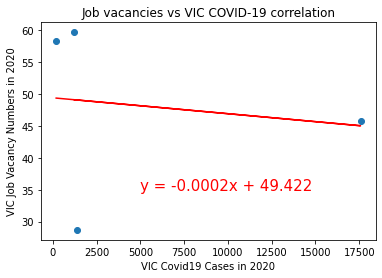

In [56]:
# plot graph to show if Job Vacancy Numbers and Total covid-19 cases in VIC in 2020 correlated
x_values = Covid_JobVac_df['VIC_CovidCase'].astype(float)
y_values = Covid_JobVac_df['VIC_JobVac'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5000,35),fontsize=15,color="red")
plt.xlabel('VIC Covid19 Cases in 2020')
plt.ylabel('VIC Job Vacancy Numbers in 2020')
plt.title('Job vacancies vs VIC COVID-19 correlation')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/Job_vacancies_vs_VIC_COVID-19_correlation')

plt.show()

### 2.3.2 check if Job Vacancy Numbers and Total coivd-19 cases in WA in 2020 correlated

The r-squared is: 0.001814632391376581
The p-value is: 0.9574014977801264
The correlation between both factors is -0.04


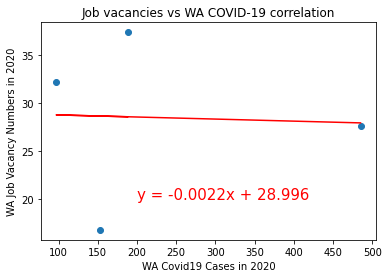

In [57]:
# plot graph to show if Job Vacancy Numbers and Total covid-19 cases in WA in 2020 correlated
x_values = Covid_JobVac_df['WA_CovidCase'].astype(float)
y_values = Covid_JobVac_df['WA_JobVac'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,20),fontsize=15,color="red")
plt.xlabel('WA Covid19 Cases in 2020')
plt.ylabel('WA Job Vacancy Numbers in 2020')
plt.title('Job vacancies vs WA COVID-19 correlation')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/Job_vacancies_vs_WA_COVID-19_correlation')

plt.show()

### 2.3.3 check if Job Vacancy Numbers and Total COVID-19 cases in Australia in 2020 correlated

The r-squared is: 0.0031792252947531146
The p-value is: 0.9436153806898272
The correlation between both factors is 0.06


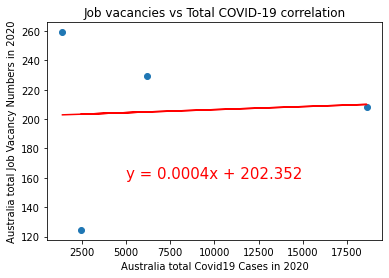

In [51]:
# plot graph to show if Job Vacancy Numbers and Total covid-19 cases in 2020 correlated

x_values = Covid_JobVac_df['total_Australia_CovidCase'].astype(float)
y_values = Covid_JobVac_df['total_Australia_JobVac'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5000,160),fontsize=15,color="red")
plt.xlabel('Australia total Covid19 Cases in 2020')
plt.ylabel('Australia total Job Vacancy Numbers in 2020')
plt.title('Job vacancies vs Total COVID-19 correlation')

print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Save the figure 
plt.savefig('Outputs/Job_vacancies_vs_Total_COVID-19_correlation')

plt.show()